# Tweet sentiment analysis with machine learning using statistical approaches

## Introduction

### Tweet sentiment analysis introduction

Sentiment analysis (SA) studies people's sentiments or feelings by analyzing natural language text data with machine learning technics. SA is an important tool in detecting customer feeling about products, events, etc. Socializing platforms could provide rich and real-time data on people's views, opinions, and arguments, and Twitter is one of the most influential and widely used communication platforms. For instance, many politicians, such as Donald Trump, use Twitter to communicate their political standings and ask for voters' support. Tweet SA can help a business quickly identify problems and avoid further loss. For example, a gadget company could monitor sentiment on the daily comments and step in business risk analysis when the sentiment drops a lot throughout a week.

There are many studies on SA using Twitter data. Many studies, such as (Tusar and Islam, 2021), extracted features based on the "Bag Of Words" (BOW) methods which treat words or words in n-grams as isolated features ignoring the relations to context. Chaudhry et al. (2021) reported an accuracy of over 94% on sentiment analysis using Naïve Bayes Classifier on tweets data about U.S. presidential election in 2016 and 2020. Chaudhry et al. (2021) identified features using the n-grams approach in combination with tf-idf. However, such approaches try to extract word features by word frequency counts. As the vocabulary size is usually big, the number of features is big and sparse. Usually, only a few hundred of the most frequent terms will be extracted as features, and most of the terms are dropped, leading to information loss.

Moreover, the BOW approach may ignore the semantic contents and the styles (e.g., emojis) highly used in tweets. Giachanou and Crestani (2016) reviewed studies on Twitter sentiment analysis and mentioned that word embeddings could be a solution with their capability to express features on both syntactic and semantic understanding. Word embedding is an approach to represent sparse words, with numbers in a pre-defined dimension.

Other approaches that retain the sequence of text during training outperform the BOW approach. For example, the recurrent neuron network(RNN) can take a fixed text sequence length and estimate the outcomes. However, RNN needs to restrain text to a fixed length by padding when text is too short or to drop when text is too long(leading to information loss). Moreover, RNN is computationally expensive and may not work well when the sequence length is very long.

This project addressed BOW's limitations by using the word embeddings approach to represent features in low-dimensional space. Furthermore, we address the limitation of fixed-length text sequence input by vectorizing a sequence as the expected values (by taking the mathematical mean value) of its tokens in respective feature dimensions. In the following report, we referred to our approach as sentence vectorization.

### Objectives

This project aims to use sentence vectorization and machine learning approaches to estimate a Tweet text(sentence) sentiment. 

Objectives include: 

	1. Cleaning tweet text from hashtags, re-tweets, name handles, informal styles (e.g., "hellooooo"), etc. to normalize text and reduce noise in text for further feature extraction and to improve estimation accuracy.  
    
	2. Handling negation such as "isn't" by adding a "NOT_" prefix to words in the consecutive sequence until punctuation. Negation could reverse text sentiment, which is difficult to understand by a machine. For example, without handling negation, the sentence "I do like Python" may have a similar sentiment to the sentence "I do not like Python." 
    
	3. Transforming tweet text to vectorized features in a two-dimensional space of positive and negative by taking the expected value of the tweet text in the distribution of tokens' positive and negative counts. Therefore, any length of tweet text could be transformed into a vector in a two-dimensional space.
    
	4. Transforming tweet text to another numerical feature vector in 300-dimensional space by taking the expected value of the tweet text's tokens. Token features are trained and extracted using the genism library Word2Vec model based on our corpus data. Representing tweets in higher dimensions may allow us to capture richer contextual, syntactic, and semantics information, which may improve model performance.
    
	5. Deciding a baseline model, which could be a well-generalized pre-trained model on sentiment prediction in natural language processing, to evaluate our models' performance and the effectiveness of the sentence vectorization approach and training on our dataset.
    
	6. Comparing the different feature extraction approaches' impact on models' performances. Furthermore, evaluating our models' effectiveness by comparing the performance of the baseline model.


### Data set

The dataset selected for this project is labeled Tweets coming from open source NLTK's Twitter corpus, which contains a total of 20k Tweets(in English) separated into three files, including 5k "positive" Tweets file and 5k "negative" Tweets file. Each Tweet data contains 28 feature information of 'text', 'user', 'retweet_count', 'geo', 'created_at' etc. The target is to analyze sentiment from Tweet text data. However, we cannot use the raw text data directly as it contains noise that can drift our inference. Tweets data could contain noises from name tags(alias, handles), re-tweets from other Tweets, hyperlinks, informal languages, tickers (symbols to identify a company), hashtags(a hash symbol with keywords to categorize topics), etc. Such noises could be handled as follows:

	1. stop words such as "you" and "in" frequently appear in Tweets but add little sentiment information to our analysis. As the popular stop words corpus includes sentiment words such as "shouldn't", we choose to customize our stop words list.
    
	2. Similarly, most punctuations frequently used contain little sentiment information. They should be removed. However, the escalation mark, which usually contains strong sentiment, should be retained.
    
	3. Different word forms that could increase features' variance with little change in sentiment should be normalized by stemming. Additionally, informal expressions, such as "waaaaay much faster" should be normalized. In our project, we will regulate character repetition to up to three consecutive sequences. 
    
	4. Handles, tickers, hyperlinks, and re-tweets which does not contain sentiment should be removed. However, we want to retain emojis, which usually carry rich sentiment information.
    
	5. Negation could be difficult for a machine to recognize when text is tokenized and vectorized, especially in the BOW approach, where information is extracted based on the frequency of words regardless of context. Text with negation could be transformed to word level. For instance, "I don't like Python" will be transformed as "I don't NOT_like NOT_python" 
    
We randomly sampled 80% of Tweet texts from the 10k labeled Tweets and visualized its distribution through WordCloud. The distribution between the raw Tweet and the cleaned Tweet is slightly different as the raw Tweet contains noise such as "https". The most frequent words in positive Tweets include "thank", "not", "love", "all", "just", "do", "like", etc. The most frequent words in negative Tweets include "not", "miss", "so", "want", "too", "like", "whi", "one", "too", etc. We found some words frequently appeared in both positive and negative Tweets, such as "not" and "like". It seemed impossible to tell a Tweet's sentiment by purely looking at word distribution. We need a machine-learning approach to explore any hidden patterns.

A sample Tweet such as "Woke up yo @trentowers fav' my tweet this made my day :))) now just @luketurner89 😂😂 http://t.co/oGw5sVij7G" was cleaned as "[woke, yo, fav, tweet, made, day, :), now, just, 😂, 😂]" with the length of 11 for cleaned Tweet. The average length of Tweet texts in the training dataset is around eight tokens, with half of the Tweet texts having 4 to 10 tokens, as shown below.

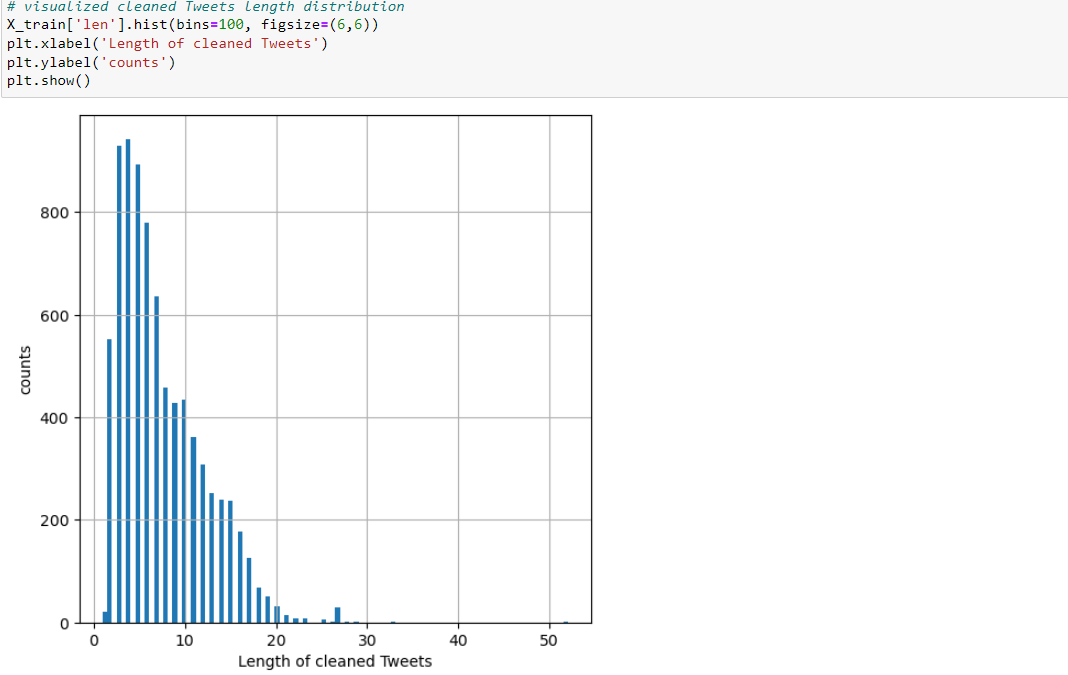

### Evaluation

We evaluated model performance from two aspects. One is to compare model performances based on specific metrics, and the other is to compare model performance with a baseline model.

Textblob is a python library that can predict sentiment for raw text by a simple function call. It is simple and generalizes well, hence could be a good baseline model. However, textblob sentiment analysis is a pre-trained model based on the nltk movie review corpus using the Naïve Bayes classifier. Therefore, we do not expect good performance as our dataset differs from the training dataset. Additionally, the Textblob classifier extracts tokens as features. It naively assumes independence among different features, which is not the truth, as words are related to each other syntactically and semantically. 

One approach that may beat baseline performance is to train a model based on our Tweets dataset. The accuracy may improve as the training, and testing datasets come from the same distribution. Another approach that may improve performance is extracting features with more context information. Instead of assuming features are independent tokens and representing them as frequency counts, we assume that a Tweet text is a distribution of its tokens, which are represented as word-embedded vectors containing rich context information. Further, we evaluated two approaches in word-embedding. One represents tokens in specific sentiment space("positive", "negative"). However, such sentiment space is too low-dimensional. The other represents tokens in higher but unexplainable feature space, hoping to extract richer context information expressed in higher dimensions. 

As our problem is a binomial classification problem with a balanced data set, accuracy is the commonly used evaluation metric in such cases. Accuracy is the ratio of correctly predicted samples over all the predictions. For a small dataset, cross-validation would be a better approach as it validates performance by iterating the whole training data set. We used cross-validation to validate the performances of different models over different feature extraction approaches. 

Our project explores datasets expressed in limited numerical features to classify binary output. Simple models such as logistic regression will fit our purpose. For comparison, a support vector machine(SVM) is trained and evaluated, as it may generalize better by taking different kernel approaches and allowing margins around decision boundaries. 

Hyperparameter tuning and regularization are used to get optimal performance of different model architectures. By comparing the performance of two sentence vectorization approaches, the winning approach will be selected to tune the models to improve performance. For logistic regression binary classification, different solvers (algorithms used in optimization), penalty terms, and the penalty's strength could make a difference in the performance. For SVC, some of the hyperparameters are specified by kernel functions. We first tuned the penalty parameter for the error term "C" with different kernels. Then, based on the optimal kernel, further tuned kernel-specific hyperparameters. 

There may be data leakage in the validation datasets during preprocessing training datasets (e.g., feature vectorization). Therefore, we must evaluate the final model on the unseen test dataset. By doing this, we can justify how the approach could generalize.


## Implementation

### Preprocessing

#### Load necessary libraries and prepare functions

In [1]:
# import necessary python libraries

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples
import string # to extract punctuation
import re # for text cleaning
import itertools # for word cloud representation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec # for tweet text vectorizing
from textblob import TextBlob

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

#### Load tweet data files

In [2]:
# check files in twitter sample corpus
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [3]:
# read target tweet files
neg = pd.read_json(twitter_samples.abspath('negative_tweets.json'), lines=True)
pos = pd.read_json(twitter_samples.abspath('positive_tweets.json'), lines=True)

In [4]:
# quick look at the positive tweets
pos.head(3)

,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,in_reply_to_user_id,created_at,metadata,favorite_count,id_str,id,possibly_sensitive,quoted_status_id,quoted_status,quoted_status_id_str
0,NaN,None,#FollowFriday @France_Inte @PKuchly57 @Milipol...,"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [{'indices': [0, 13], 'text': 'Fo...","<a href=""https://commun.it"" rel=""nofollow"">Com...",False,None,...,NaN,2015-07-24 08:23:36+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495129303351296,624495129303351296,NaN,NaN,NaN,NaN
1,NaN,None,@Lamb2ja Hey James! How odd :/ Please call our...,"{'time_zone': 'London', 'profile_background_im...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,19458835.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495128510656512,624495128510656513,NaN,NaN,NaN,NaN
2,NaN,None,@DespiteOfficial we had a listen last night :)...,"{'time_zone': 'Casablanca', 'profile_backgroun...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,275918243.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126535106560,624495126535106560,NaN,NaN,NaN,NaN


In [5]:
# quick look at the negative tweets
neg.head(3)

,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,in_reply_to_user_id,created_at,metadata,favorite_count,id_str,id,quoted_status,quoted_status_id,possibly_sensitive,quoted_status_id_str
0,NaN,None,hopeless for tmr :(,"{'screen_name': 'yuwraxkim', 'time_zone': 'Jak...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,...,NaN,2015-07-24 10:42:49+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530164626534400,624530164626534400,NaN,NaN,NaN,NaN
1,NaN,None,Everything in the kids section of IKEA is so c...,"{'screen_name': 'EveHollyHousley', 'time_zone'...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,NaN,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530162890219520,624530162890219521,NaN,NaN,NaN,NaN
2,NaN,None,@Hegelbon That heart sliding into the waste ba...,"{'screen_name': 'prostgrad', 'time_zone': 'Ath...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,1.633281e+09,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",1,624530162600812544,624530162600812544,NaN,NaN,NaN,NaN


In [6]:
print(pos.columns==neg.columns)
pos.columns

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True]


Index(['contributors', 'coordinates', 'text', 'user', 'retweet_count',
       'favorited', 'entities', 'source', 'truncated', 'geo',
       'in_reply_to_status_id_str', 'is_quote_status',
       'in_reply_to_user_id_str', 'place', 'in_reply_to_status_id',
       'in_reply_to_screen_name', 'lang', 'retweeted', 'in_reply_to_user_id',
       'created_at', 'metadata', 'favorite_count', 'id_str', 'id',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status',
       'quoted_status_id_str'],
      dtype='object')

In [7]:
neg.columns

Index(['contributors', 'coordinates', 'text', 'user', 'retweet_count',
       'favorited', 'entities', 'source', 'truncated', 'geo',
       'in_reply_to_status_id_str', 'is_quote_status',
       'in_reply_to_user_id_str', 'place', 'in_reply_to_status_id',
       'in_reply_to_screen_name', 'lang', 'retweeted', 'in_reply_to_user_id',
       'created_at', 'metadata', 'favorite_count', 'id_str', 'id',
       'quoted_status', 'quoted_status_id', 'possibly_sensitive',
       'quoted_status_id_str'],
      dtype='object')

In [8]:
print("shape of positive tweets: ", pos.shape)
print("shape of negative tweets: ", neg.shape)

shape of positive tweets:  (5000, 28)
shape of negative tweets:  (5000, 28)


#### Select target data / columns

In [9]:
# assign labels to tweets data sets
pos['labels'] = np.ones(5000)
neg['labels'] = np.zeros(5000)

In [10]:
# combine and extract the target datasets 
df = pd.concat([pos[["text", "labels"]], neg[["text", "labels"]]], ignore_index=True)

In [11]:
# quick look on the extracted data
df.sample(10)

,text,labels
7261,I need a massage :((,0.0
541,@UptownJavin @ChloeeElmoree @Eymvnique family ...,1.0
3281,NBA 2K15 MyPark – The Chronicles of Gryph: Vol...,1.0
5303,*sign out* :(((((( https://t.co/y45q9GAJ5j,0.0
6098,@wydbaylee i just need to put on some clothes ...,0.0
9509,although my mum asked me to watch it w her… bu...,0.0
7199,@Uber_Delhi no supercars &amp; now no ice crea...,0.0
4842,@ajm9890 \nThakyou sir :),1.0
3803,"If you want to make someone happy, just compli...",1.0
2209,"Thank you :) ""@khuzy_k: @Miss_Sejeng Happy bir...",1.0


#### Generate clean text column

##### define helper function for text cleaning

In [12]:
# function for clean messy tweet text
def clean_str(s):
    """
    tokenize input string data.
        
    Parameters
    ---------
    s : string
        the input text string.
        
    Return
    ------
    output : list
             list of tokens. 
             
    See also
    --------
    string.punctuation
    TweetTokenizer
    PorterSetmmer
    re
    nltk.corpus    
    """
    stemmer = PorterStemmer()
    tokenizer = TweetTokenizer(preserve_case=False, # convert characters to lower case
                               strip_handles=True, # remove user names (i.e. @may )
                               reduce_len=True # restrict repeated character sequence to no more than 3
                              )
    # customize stopwords from nltk.corpus english stopwords list
    stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', "i'm"
                 'ourselves', 'you', "you're", "you've", "you'll",
                 "you'd", 'your', 'yours', 'yourself', 'yourselves',
                 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
                 'hers', 'herself', 'it', "it's", 'its', 'itself',
                 'they', 'them', 'their', 'theirs', 'themselves',
                 'what', 'which', 'who', 'whom', 'this', 'that',
                 "that'll", 'these', 'those', 'am', 'is', 'are',
                 'was', 'were', 'be', 'been', 'being', 'have', 'has',
                 'had', 'having', 'doing', 'a','an', 'the', 'and',  
                 'while', 'of', 'at', 'by', 'for',  'but', 'if',
                 'with', 'about', 'between', 'into', 'or',
                 'through', 'during', 'before', 'after', 'above',
                 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                 'on', 'off', 'over', 'under', 'further',
                 'then', 'here', 'there', 'when', 'where', 
                 'both', 'each','other', 's', 't' ]
    punctuation = string.punctuation.replace("!", "") # punctuations exclude "!"
    # remove retweet text "RT @UserName", 
    s = re.sub(r'^RT[\s]+', '', s)
    # remove stock market tickers "$"
    s = re.sub(r'\$\w*', '', s)
    # remove hyperlinks, hashtags
    s = re.sub(r'(https?://[^\s\n\r]+)|(#[^\s\n\r]+)', '', s)
    
    clean_s = []
    negation = False
    tokens = tokenizer.tokenize(s)
    for token in tokens:
        if (token not in stopwords) and (token not in punctuation):
            stemmed_token = stemmer.stem(token)
            negated_token = "not_" + stemmed_token if negation else stemmed_token
            clean_s.append(negated_token)
        # evoke negate tranformation when a token contains negated terms
        if any(char in token for char in ["not ", "n't ", "no "]):
            negation = True
        # stop negate transformation until punctuations(except apostrophe)
        if any(char in token for char in string.punctuation.replace("'",'')):
            negation = False
            
    return clean_s

In [13]:
df['clean_text'] = df['text'].astype(str).apply(clean_str )

#### Generate length column by counting the length of clean text data

In [14]:
df['len'] = df['clean_text'].apply(len)

In [15]:
# quick look at new data frame
df.head()

,text,labels,clean_text,len
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1.0,"[top, engag, member, commun, week, :)]",6
1,@Lamb2ja Hey James! How odd :/ Please call our...,1.0,"[hey, jame, !, how, odd, :/, pleas, call, cont...",18
2,@DespiteOfficial we had a listen last night :)...,1.0,"[listen, last, night, :), as, bleed, amaz, tra...",10
3,@97sides CONGRATS :),1.0,"[congrat, :)]",2
4,yeaaaah yippppy!!! my accnt verified rqst has...,1.0,"[yeaaah, yipppi, !, !, !, accnt, verifi, rqst,...",18


#### Split training and testing datasets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'clean_text','len']],
                                                    df.labels, test_size=0.2, random_state=100)

In [17]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (8000, 3)
y_train:  (8000,)
X_test:  (2000, 3)
y_test:  (2000,)


#### Data exploration

In [18]:
# stats of text length
X_train.describe()

,len
count,8000.000000
mean,7.576000
std,4.578902
min,1.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,52.000000


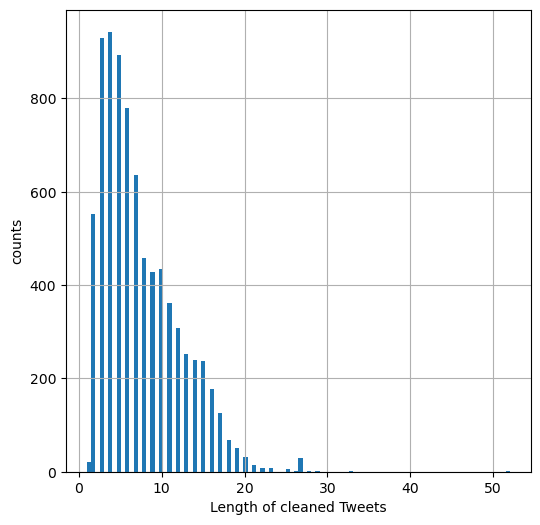

In [19]:
# visualized cleaned Tweets length distribution
X_train['len'].hist(bins=100, figsize=(6,6))
plt.xlabel('Length of cleaned Tweets')
plt.ylabel('counts')
plt.show()

The average length of Tweet texts in the training dataset is around 8 tokens, while the maxium length is 52 tokens and minimum length is only 1 token. Half Tweet texts have length from 4 to 10 tokens. 

In [20]:
print("number of positive Tweets in X_train: ", len(X_train[y_train ==1]))
print("number of negative Tweets in X_train: ", len(X_train[y_train ==0]))

number of positive Tweets in X_train:  4012
number of negative Tweets in X_train:  3988


In [21]:
# present a sample text, cleaned tokens and length
pd.set_option('display.max_colwidth', None)
X_train.loc[818]

text          Woke up yo @trentowers fav' my tweet this made my day :))) now just @luketurner89 😂😂 http://t.co/oGw5sVij7G
clean_text                                                         [woke, yo, fav, tweet, made, day, :), now, just, 😂, 😂]
len                                                                                                                    11
Name: 818, dtype: object

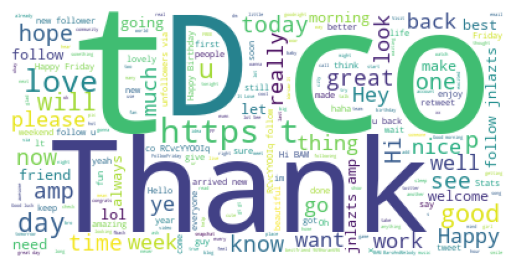

In [22]:
# visulize the positive raw tweets by word cloud
wordcloud_pos_r = WordCloud(background_color='white',random_state=200
                     ).generate(' '.join(X_train[y_train ==1]['text']))
plt.imshow(wordcloud_pos_r)
plt.axis('off')
plt.show()

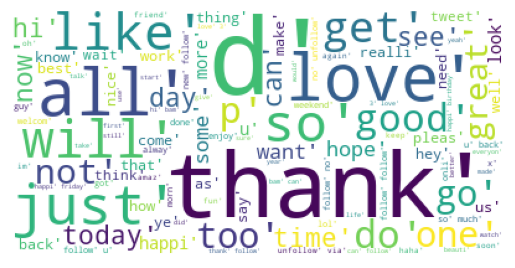

In [23]:
# visulize the positive cleaned tweets by word cloud
wordcloud_pos_c = WordCloud(background_color='white',random_state=200
                     ).generate(str(list(itertools.chain.from_iterable(X_train[y_train ==1]['clean_text']))))
plt.imshow(wordcloud_pos_c)
plt.axis('off')
plt.show()

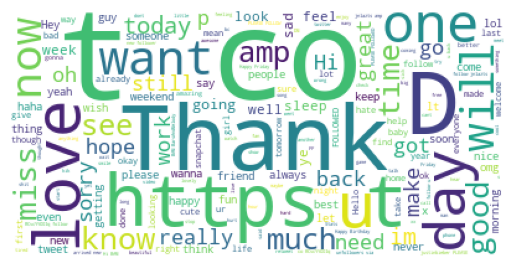

In [24]:
# visulize the raw negative tweets by word cloud
wordcloud_neg_r = WordCloud(background_color='white',random_state=200
                     ).generate(' '.join(X_train['text']))
plt.imshow(wordcloud_neg_r)
plt.axis('off')
plt.show()

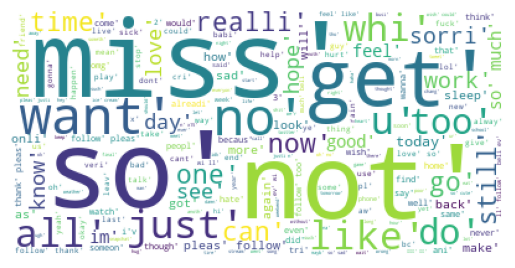

In [25]:
# visulize the positive cleaned tweets by word cloud
wordcloud_neg_c = WordCloud(background_color='white',random_state=200
                     ).generate(str(list(itertools.chain.from_iterable(X_train[y_train ==0]['clean_text']))))
plt.imshow(wordcloud_neg_c)
plt.axis('off')
plt.show()

As shown above clean Tweets word clouds, we can see that the negative Tweets and positive Tweets have different distribution while some words are common and with high frequency, such as "just". The raw Tweets word clouds showed different distribution from the cleaned Tweets as raw Tweets contained noises such as "https".

#### Feature extraction

##### define helper functions to extract features

In [26]:
def word_freqs(tweets, labels):  
    """
    count (term, label) pairs in input text.
    
    Parameters
    ----------
    tweets : strings
             the input tweets text
    labels : integers
             sentiment labels for input tweets, represented by either {0,1}
             
    Returns
    -------
    freqs_dict : dict 
                 frequency dictionary with keys as (term, label), values as frequency counts. 
    vocab : list
            vocabulary consisting unique terms from the input text.
    """
    freqs_dict={}
    for text, label in zip(tweets, labels): 
        for token in clean_str(text):
            if (token,label) in freqs_dict:
                freqs_dict[(token,label)] += 1
            else: 
                freqs_dict[(token,label)] = 1
                
    words = []            
    for (word, senti) in freqs_dict.keys():
        words.append(word)
    vocab = set(words)
    return freqs_dict, vocab

In [27]:
# extract (term,label)pair frequency and vocabulary
freqs, vocab=word_freqs(X_train['text'], y_train)

In [28]:
def sent2vec_2d(tweets):
    """
    convert text sequence data to vectors
    
    Parameters
    ----------
    tweets : array-like, iterable data such as pandas series, list
             tweets text data
             
    Returns
    -------
    sent-vec : 2-dimensional numpy array
               vectorized tweet texts data
    
    """
    sent=[]
    for tweet in tweets:
        pos=0
        neg=0
        for token in clean_str(tweet):
            if (token,1) in freqs.keys():
                pos += freqs[(token,1)]
            if (token,0) in freqs.keys():
                neg += freqs[(token,0)]
        pos_mean = pos/len(clean_str(tweet))
        neg_mean = neg/len(clean_str(tweet))
        sent.append([pos_mean,neg_mean])
    sent_vec=np.array(sent)
    return sent_vec

In [29]:
# training Word2Vec model based on tweets training dataset
model_w2v = Word2Vec(sentences=X_train['clean_text'], vector_size=300, window=5, min_count=1)

# helper function to represent a Tweet text as 300 dimensional vector
def sent2vec_300d(tweets): 
    """
    convert text sequence data to vectors.
    
    print out a Tweet's index and content if none of its tokens is in vocabulary.
    
    Parameters
    ----------
    tweets : array-like, iterable data such as pandas series, list
             tweets text data
             
    Returns
    -------
    sent-vec : 300-dimensional numpy array
               vectorized tweet texts data
    
    """
    sent_vec=np.zeros((len(tweets), 300))
    for i, tweet in enumerate(tweets):
        tokens=clean_str(tweet)
        tokens_vec = []
        for token in tokens:
            if token in vocab:
                tokens_vec.append(model_w2v.wv[token])
        if len(tokens_vec)!=0:
            sent_vec[i] = np.mean(tokens_vec, axis=0)
        else:
            print("sentence {} '{}' is not in vocab, could not be vectorized ".format(i,tweet))
    return sent_vec


##### Extract features for training dataset and testing dataset

In [30]:
# convert training and testing tweet text data into sentence vectors
X_train_2d = sent2vec_2d(X_train['text'])
X_test_2d = sent2vec_2d(X_test['text'])

In [31]:
# convert training and testing tweet text data into sentence vectors
X_train_300d = sent2vec_300d(X_train['text'])
X_test_300d = sent2vec_300d(X_test['text'])

In [32]:
print("X_train_2d shape: ", X_train_2d.shape)
print("X_train_300d shape: ", X_train_300d.shape)
print("X_test_2d shape: ", X_test_2d.shape)
print("X_test_300d shape: ", X_test_300d.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train_2d shape:  (8000, 2)
X_train_300d shape:  (8000, 300)
X_test_2d shape:  (2000, 2)
X_test_300d shape:  (2000, 300)
y_train shape:  (8000,)
y_test shape:  (2000,)


### Baseline Performance

#### define helper function for baseline model prediction

In [33]:
# helper function with textblob sentiment polarity prediction
def textblob_predictor(tweets):
    """
    predict sentiment labels for list of tweet texts
    
    Parameters
    ----------
    tweets : array-like, iterable data such as pandas series, list
             tweets text data
             
    Returns
    -------
    predict : array-like, iterable data such as pandas series, list
              list of sentiment labels.  
    
    """
    predict=[]
    for tweet in tweets: 
        blob=TextBlob(tweet)
        senti=blob.sentiment.polarity
        if senti >=0:
            senti = 1
        if senti <=0:
            senti=0
        predict.append(senti)
    return predict          
            

In [34]:
# predict sentiment on both training and testing tweets data
baseline_predict_train = textblob_predictor(X_train['text'])
baseline_predict_test = textblob_predictor(X_test['text'])

In [35]:
baseline_acc_train = accuracy_score(y_train, baseline_predict_train)
print(baseline_acc_train)

0.968625


In [36]:
baseline_acc_test = accuracy_score(y_test, baseline_predict_test)
print(baseline_acc_test)

0.963


### Classification approaches

To train models on two type of Tweet feature representations. 

In [37]:
# evaluate performance by logistic regression
lr = LogisticRegression()

# modelling based Tweet feature transformation to 2dimensional space
lr_2d_scores = cross_validate(lr, X_train_2d, y_train, cv=5, scoring="accuracy", return_train_score=True)

print("Performance based on Tweet feature transformation to 2 dimensional space: ")
print("cross validation accurary of training datasets: ", lr_2d_scores['train_score'])
print("cross validation accuracy of validation datasets: ", lr_2d_scores['test_score'])
print("Average accuracy of training dataset: ", lr_2d_scores['train_score'].mean(), 
      "\nStandard deviation: ", lr_2d_scores['train_score'].std())
print("Average accuracy of validation dataset: ", lr_2d_scores['test_score'].mean(), 
      "\nStandard deviation: ", lr_2d_scores['test_score'].std())

# modelling based Tweet feature transformation to 300dimensional space
print("\nPerformance based on Tweet feature transformation to 300 dimensional space: ")
lr_300d_scores = cross_validate(lr, X_train_300d, y_train, cv=5, scoring="accuracy", return_train_score=True)
print("cross validation accurary of training datasets: ", lr_300d_scores['train_score'])
print("cross validation accuracy of validation datasets: ", lr_300d_scores['test_score'])
print("Average accuracy of training dataset: ", lr_300d_scores['train_score'].mean(), 
      "\nStandard deviation: ", lr_300d_scores['train_score'].std())
print("Average accuracy of validation dataset: ", lr_300d_scores['test_score'].mean(), 
      "\nStandard deviation: ", lr_300d_scores['test_score'].std())


Performance based on Tweet feature transformation to 2 dimensional space: 
cross validation accurary of training datasets:  [0.9865625  0.98765625 0.9878125  0.9875     0.98796875]
cross validation accuracy of validation datasets:  [0.990625 0.985625 0.985625 0.988125 0.986875]
Average accuracy of training dataset:  0.9875 
Standard deviation:  0.0004941058844012953
Average accuracy of validation dataset:  0.9873750000000001 
Standard deviation:  0.0018708286933869782

Performance based on Tweet feature transformation to 300 dimensional space: 
cross validation accurary of training datasets:  [0.84546875 0.845      0.84828125 0.84609375 0.85015625]
cross validation accuracy of validation datasets:  [0.850625 0.8425   0.846875 0.853125 0.8325  ]
Average accuracy of training dataset:  0.8469999999999999 
Standard deviation:  0.0019374999999999898
Average accuracy of validation dataset:  0.845125 
Standard deviation:  0.007260767865728797


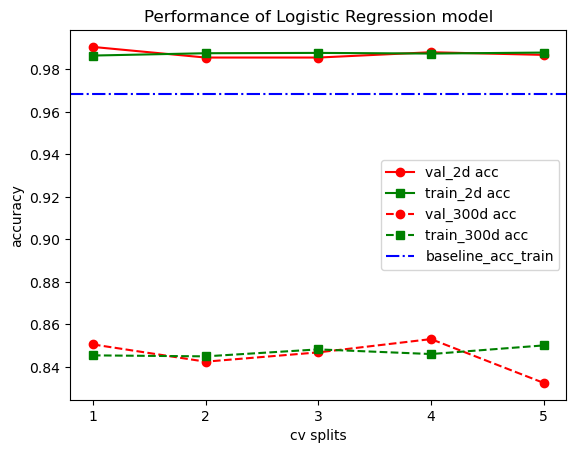

In [38]:
# visualize the cross validation accuracy scores on training and validation data splits
plt.plot(range(1,6), lr_2d_scores['test_score'], 'ro-', label="val_2d acc")
plt.plot(range(1,6), lr_2d_scores['train_score'],'gs-', label="train_2d acc")
plt.plot(range(1,6), lr_300d_scores['test_score'], 'ro--', label="val_300d acc")
plt.plot(range(1,6), lr_300d_scores['train_score'],'gs--', label="train_300d acc")
# plot baseline accuracy
plt.axhline(y = baseline_acc_train, color = 'b', linestyle = '-.', label="baseline_acc_train")

plt.legend(["val_2d acc","train_2d acc","val_300d acc","train_300d acc","baseline_acc_train"])
plt.xlabel("cv splits")
plt.ylabel("accuracy")
plt.xticks([1,2,3,4,5])
plt.title('Performance of Logistic Regression model')
plt.show()

In [39]:
# evaluate performance by SVC
svc = SVC(kernel = 'linear', random_state = 100)

# modelling based Tweet feature transformation to 2dimensional space
svc_2d_scores = cross_validate(svc, X_train_2d, y_train, cv=5, scoring="accuracy", return_train_score=True)

print("Performance based on Tweet feature transformation to 2 dimensional space: ")
print("cross validation accurary of training datasets: ", svc_2d_scores['train_score'])
print("cross validation accuracy of validation datasets: ", svc_2d_scores['test_score'])
print("Average accuracy of training dataset: ", svc_2d_scores['train_score'].mean(), 
      "\nStandard deviation: ", svc_2d_scores['train_score'].std())
print("Average accuracy of validation dataset: ", svc_2d_scores['test_score'].mean(), 
      "\nStandard deviation: ", svc_2d_scores['test_score'].std())

# modelling based Tweet feature transformation to 300dimensional space
print("\nPerformance based on Tweet feature transformation to 300 dimensional space: ")
svc_300d_scores = cross_validate(svc, X_train_300d, y_train, cv=5, scoring="accuracy", return_train_score=True)
print("cross validation accurary of training datasets: ", svc_300d_scores['train_score'])
print("cross validation accuracy of validation datasets: ", svc_300d_scores['test_score'])
print("Average accuracy of training dataset: ", svc_300d_scores['train_score'].mean(), 
      "\nStandard deviation: ", svc_300d_scores['train_score'].std())
print("Average accuracy of validation dataset: ", svc_300d_scores['test_score'].mean(), 
      "\nStandard deviation: ", svc_300d_scores['test_score'].std())


Performance based on Tweet feature transformation to 2 dimensional space: 
cross validation accurary of training datasets:  [0.9865625  0.98734375 0.9878125  0.9871875  0.98765625]
cross validation accuracy of validation datasets:  [0.989375 0.9875   0.985625 0.99     0.986875]
Average accuracy of training dataset:  0.9873125 
Standard deviation:  0.0004352621336619984
Average accuracy of validation dataset:  0.9878750000000001 
Standard deviation:  0.0016105123408406512

Performance based on Tweet feature transformation to 300 dimensional space: 
cross validation accurary of training datasets:  [0.85390625 0.8603125  0.848125   0.84984375 0.841875  ]
cross validation accuracy of validation datasets:  [0.855    0.846875 0.855625 0.856875 0.836875]
Average accuracy of training dataset:  0.8508125 
Standard deviation:  0.006129621980595536
Average accuracy of validation dataset:  0.8502500000000002 
Standard deviation:  0.007558108228915473


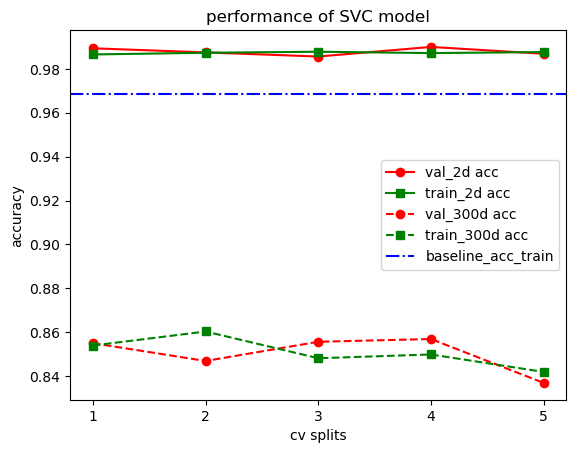

In [40]:
# visualize the cross validation accuracy scores on training and validation data splits
plt.plot(range(1,6), svc_2d_scores['test_score'], 'ro-', label="val_2d acc")
plt.plot(range(1,6), svc_2d_scores['train_score'],'gs-', label="train_2d acc")
plt.plot(range(1,6), svc_300d_scores['test_score'], 'ro--', label="val_300d acc")
plt.plot(range(1,6), svc_300d_scores['train_score'],'gs--', label="train_300d acc")
# plot baseline accuracy
plt.axhline(y = baseline_acc_train, color = 'b', linestyle = '-.', label="baseline_acc_train")

plt.legend(["val_2d acc","train_2d acc","val_300d acc","train_300d acc","baseline_acc_train"])
plt.xlabel("cv splits")
plt.ylabel("accuracy")
plt.xticks([1,2,3,4,5])
plt.title('performance of SVC model')
plt.show()

#### Hyperparameter tuning and regularization

##### Tune Logistic Regression model

In [41]:
# logistic regression 
param_grid_lr={
            'solver': ['lbfgs','liblinear'],
            'C': [0.01, 0.1, 1.0,10], 
            'penalty':['l2']
                }
rf_grids = GridSearchCV(lr, param_grid_lr, scoring='accuracy')
rf_grids.fit(X_train_2d, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [42]:
print("The mean test score for each hyperparameter combination: \n", rf_grids.cv_results_['mean_test_score'])
print("The best hyper parameter set: ", rf_grids.best_params_)
print("The best score: ", rf_grids.best_score_)

The mean test score for each hyperparameter combination: 
 [0.987375 0.9875   0.987375 0.987625 0.987375 0.988375 0.987375 0.988375]
The best hyper parameter set:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The best score:  0.9883749999999999


##### Evaluate final model performance

In [43]:
lr_final = lr.set_params(**rf_grids.best_params_)
lr_final.fit(X_train_2d, y_train)
lr_final_pred = lr_final.predict(X_test_2d)
lr_acc_test = accuracy_score(y_test, lr_final_pred)
print("Optimal Logistic Regression accuracy on test dataset: ", lr_acc_test)

Optimal Logistic Regression accuracy on test dataset:  0.987


In [44]:
# visualize results as confusion matrix
confusion_matrix(y_test, lr_final_pred)

array([[994,  18],
       [  8, 980]], dtype=int64)

##### Tuning SVC model

In [45]:
# SVC tuning "C" and "kernel" function
param_grid_svc={
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.01, 0.1, 1.0,10, 30],
                }
svc_grids = GridSearchCV(svc, param_grid_svc, scoring='accuracy')
svc_grids.fit(X_train_2d, y_train)

GridSearchCV(estimator=SVC(kernel='linear', random_state=100),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 30],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [46]:
print("The mean test score for each hyperparameter combination: \n", svc_grids.cv_results_['mean_test_score'])
print("The best hyper parameter set: ", svc_grids.best_params_)
print("The best score: ", svc_grids.best_score_)

The mean test score for each hyperparameter combination: 
 [0.9875   0.853625 0.96325  0.96     0.9875   0.913875 0.979    0.9695
 0.987875 0.94125  0.987    0.94875  0.987625 0.949375 0.98875  0.945
 0.987625 0.952    0.9885   0.945   ]
The best hyper parameter set:  {'C': 10, 'kernel': 'rbf'}
The best score:  0.9887499999999999


In [47]:
# SVC with 'rbf' kernel to tune gamma and C
param_grid_svc={
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1.0,10, 100, 500],
            'gamma': [0.01, 0.1, 1.0,10, 100, 500]
                }
svc_grids_rbf = GridSearchCV(svc, param_grid_svc, scoring='accuracy')
svc_grids_rbf.fit(X_train_2d, y_train)

GridSearchCV(estimator=SVC(kernel='linear', random_state=100),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 500],
                         'gamma': [0.01, 0.1, 1.0, 10, 100, 500],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [48]:
print("The mean test score for each hyperparameter combination: \n", svc_grids_rbf.cv_results_['mean_test_score'])
print("The best hyper parameter set: ", svc_grids_rbf.best_params_)
print("The best score: ", svc_grids_rbf.best_score_)

The mean test score for each hyperparameter combination: 
 [0.551625 0.506125 0.5015   0.5015   0.5015   0.5015   0.937875 0.64525
 0.618125 0.57125  0.55275  0.5525   0.97825  0.918    0.75     0.602125
 0.575125 0.5735   0.97825  0.921    0.757625 0.60475  0.57575  0.5735
 0.978625 0.92125  0.757625 0.60475  0.57575  0.5735   0.979375 0.9215
 0.757625 0.60475  0.57575  0.5735  ]
The best hyper parameter set:  {'C': 500, 'gamma': 0.01, 'kernel': 'rbf'}
The best score:  0.9793749999999999


##### Evaluate final model performance

In [49]:
svc_final = svc.set_params(**svc_grids_rbf.best_params_)
svc_final.fit(X_train_2d, y_train)
svc_final_pred = svc_final.predict(X_test_2d)
svc_acc_test = accuracy_score(y_test, svc_final_pred)
print("Optimal SVC accuracy on test dataset: ", svc_acc_test)

Optimal SVC accuracy on test dataset:  0.982


In [50]:
# visualize results as confusion matrix
confusion_matrix(y_test, svc_final_pred)

array([[1004,    8],
       [  28,  960]], dtype=int64)

## Conclusions

### Evaluation

Surprisingly, the Textblob predicted Tweets sentiment correctly over 96% of the time. Furthermore, unlike other tasks in natural language processing, such as topic modeling, the SA has a universal sentiment space (positive and negative), which may allow the pre-trained model to be easily generalized on the Tweet dataset. 

Firstly, we wanted to evaluate performance improvement if the test data has the same distribution as the training data. Then, we wanted to evaluate if a richer word representation could improve estimation accuracy. The training and validation performance from both logistic regression (RF) and SVC models showed that sentence vectorizing on 2-dimensional space outperformed the approach on 300-dimensional space. Both LR and SVM models performed better based on feature representation on 2-dimensional space (estimated accuracy to be 98% for both algorithms) than on 300-dimensional space (both around 85% accuracy). Compared with the baseline model, we can see a noticeable improvement with the sentence vectorizing on 2-dimensional space. However, the approach representing text in 300-dimensional space performs worse than the baseline model.

Moreover, the Sentence vectorization approach on both 2-dimensional  and 300-dimensional showed little overfitting as training, and validation accuracy follows each other closely. Despite little sign of overfitting, we are not sure if there is data leakage during our pre-processing, as it was done on the whole training dataset. We tuned LR and SVC for the optimum model and evaluated the performance on the test dataset based on 2-dimensional features as it has much higher accuracy than 300-dimensional features. RF performed slightly better than SVC based on our results. The accuracy for RF is around 98.7% and for SVC is around 98.2%. Not much difference from the initial RF and SVC models. Hence, both our models were proved to have strong inference power. 

Alternatively, representing a Tweet text in some 300-dimensional feature space is more difficult to interpret and weaker in estimation than baseline model sentiment prediction. 

Overall, we found the word vectorization approach to representing feature directly on the sentiment space(e.g., "positive", "negative") outperform a word embedding model, which represents features in unexplainable 300-dimensional space. Therefore, our approach to representing a text by the distribution of its tokens could work well on sentiment analysis. Moreover, LR could be a preferred estimating model for its higher accuracy and less computational cost. Hence, the LR model with sentence vectorization on the 2-dimensional sentiment space could be a better choice to estimate a long or short text easily and quickly. Furthermore, we can customize our estimation by taking different granularities if we refer to the text length as granularity. In a real-life application, we can estimate sentiment based on a sentence level, daily level which estimates sentiment based on all text strings within a day, etc. 

### Summary and conclusions

We have set aims and objectives at the beginning of the project. We have achieved all our aims and objectives within the project time frame.

We found that representing a Tweet as the expected value of distributions of its token vectors in the sentiment space (e.g., "positive", "negative") provided much better performance than representing the feature in some unexplainable n-dimensional space (e.g., 300-dimensional feature in our project). Next, our models showed a noticeable performance improvement compared to general models such as Textblob. Hence, model estimation based on our dataset could predict better than pre-trained predictors based on the general corpus (e.g., Textblob trained on the nltk corpus movie review dataset). However, the improvement is not substantial. 

Besides, the pre-trained model, such as Textblob (pre-trained on nltk corpus movie review dataset), could infer Tweets sentiment with an accuracy of over 96%. SA could generalize well when features are represented in its sentiment space. Hence, our model could generalize well on other datasets. One of the reasons may be because the feature space is "universal" (e.g., being ["positive", "negative"]). Such "university" of feature space may allow our features to be a representative "slice" of the whole "population". Textblob has been proven to be well performed on our Tweet dataset. 

There are some limitations to extracting feature vectors based on specific training data. For example, during the test data prediction, we set word types not represented in the training vocabulary to be ignored. Hence, we cannot predict the sentiment of a text with all its terms not included in training vocabulary. Furthermore, we have yet to explore how SA on different text granularities, which could be further explored in future studies. 


## References

Chaudhry, H.N., Javed, Y., Kulsoom, F., Mehmood, Z., Khan, Z.I., Shoaib, U. and Janjua, S.H. (2021) 'Sentiment Analysis of before and after Elections: Twitter Data of U.S. Election 2020.' *Electronics 2021*, 10(17/2082)[online]. Available at: https://doi.org/10.3390/electronics10172082   

Giachanou A. and Crestani, F. (2016) 'Like it or not: A survey of Twitter sentiment analysis methods' *ACM Comput. Surv*,  49(2/28)[online]. Available at: http://dx.doi.org/10.1145/2938640


Tusar M.T.H.K. and Islam M.T. (2021) 'A Comparative Study of Sentiment Analysis Using NLP and Different Machine Learning Techniques on US Airline Twitter Data' *Computation and Language (cs.CL), Artificial Intelligence (cs.AI), Machine Learning (cs.LG), FOS: Computer and information sciences, FOS: Computer and information sciences* [online]. Available at: https://doi.org/10.48550/arxiv.2110.00859 


